In [3]:

#Import the Necessary Libraries 

import mne
import pandas as pd 
import numpy
from scipy.io import loadmat
import scipy
import matplotlib.pyplot as plt

In [113]:
### Load the EEG Data
# https://mne.tools/stable/generated/mne.io.read_raw_gdf.html#mne.io.read_raw_gdf

"""Explination: Load Data: The GDF file is loaded into an MNE Raw object, which is a convenient structure for handling continuous EEG data. The Raw object stores data along with metadata, such as channel names, sampling frequency, and measurement units.
EOG Handling: By specifying EOG channels, MNE knows to treat these channels differently during preprocessing steps like filtering, epoching, and artifact correction. It helps in separating EEG signals from potential noise caused by eye movements.
Accessing Data: Once loaded, you can access various properties of the Raw object. For example, raw.info will display information about the channels, including types and sampling rates, while raw.plot() allows you to visualize the data."""

"""
Event type Description
276 0x0114 Idling EEG (eyes open) = 3
277 0x0115 Idling EEG (eyes closed) = 4
768 0x0300 Start of a trial = 6
769 0x0301 Cue onset left (class 1) = 7
770 0x0302 Cue onset right (class 2) = 8
771 0x0303 Cue onset foot (class 3) = 9
772 0x0304 Cue onset tongue (class 4) = 10
783 0x030F Cue unknown
1023 0x03FF Rejected trial = 1
1072 0x0430 Eye movements = 2
32766 0x7FFE Start of a new run

{'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})"""


raw = mne.io.read_raw_gdf('data_gdf/A01T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [114]:
#Visualize the data and info about the data

#print(raw.info)
#raw.plot()
print(raw.ch_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [115]:
"""
Why Drop Channels?
Simplify Data Analysis:
Removing non-essential channels can simplify data visualization and analysis, especially if you're only interested in EEG activity.
Reduce Memory Usage:
Dropping channels reduces the dataset's size, which can be beneficial for computational efficiency and memory management.
Focus on Relevant Data:
Dropping irrelevant channels helps focus the analysis on the signals of interest, ensuring that any preprocessing or analysis steps are applied only to the necessary channels.

"""
# you don't have to do it twice since it is already been removed from the first execution.
#raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

"\nWhy Drop Channels?\nSimplify Data Analysis:\nRemoving non-essential channels can simplify data visualization and analysis, especially if you're only interested in EEG activity.\nReduce Memory Usage:\nDropping channels reduces the dataset's size, which can be beneficial for computational efficiency and memory management.\nFocus on Relevant Data:\nDropping irrelevant channels helps focus the analysis on the signals of interest, ensuring that any preprocessing or analysis steps are applied only to the necessary channels.\n\n"

In [116]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [98]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [99]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [100]:
event_dict = {
    'reject': 1,
  'eye move': 2,
  'eye open': 3,
  'eye close': 4,
  'new run': 5,
  'new trial': 6,
  'class 1': 7,
  'class 2': 8,
  'class 3': 9,
  'class 4': 10}



In [108]:
events[0]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

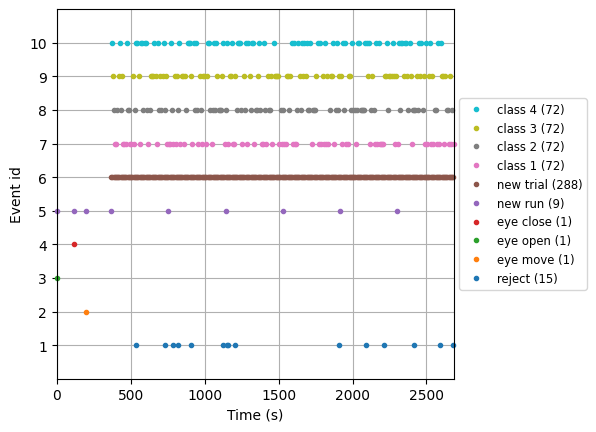

In [109]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],first_samp=raw.first_samp)

In [149]:
events[0][:]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

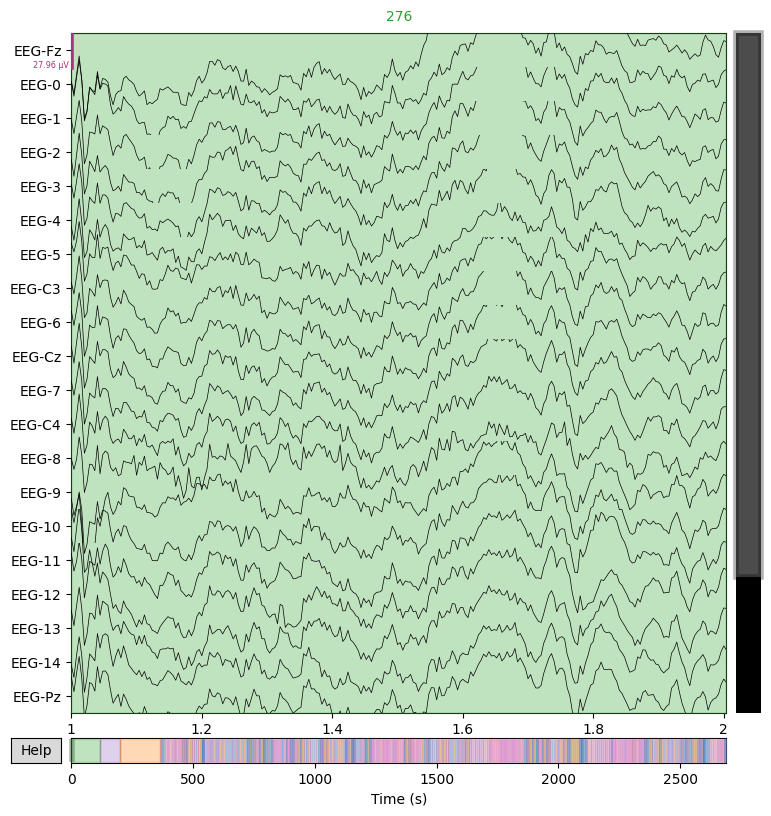

In [150]:
fig = raw.plot(events=events[0][:], start=1, duration=1, scalings='auto')

In [153]:

mne.viz.plot_event_histogram(events)

AttributeError: No mne.viz attribute plot_event_histogram

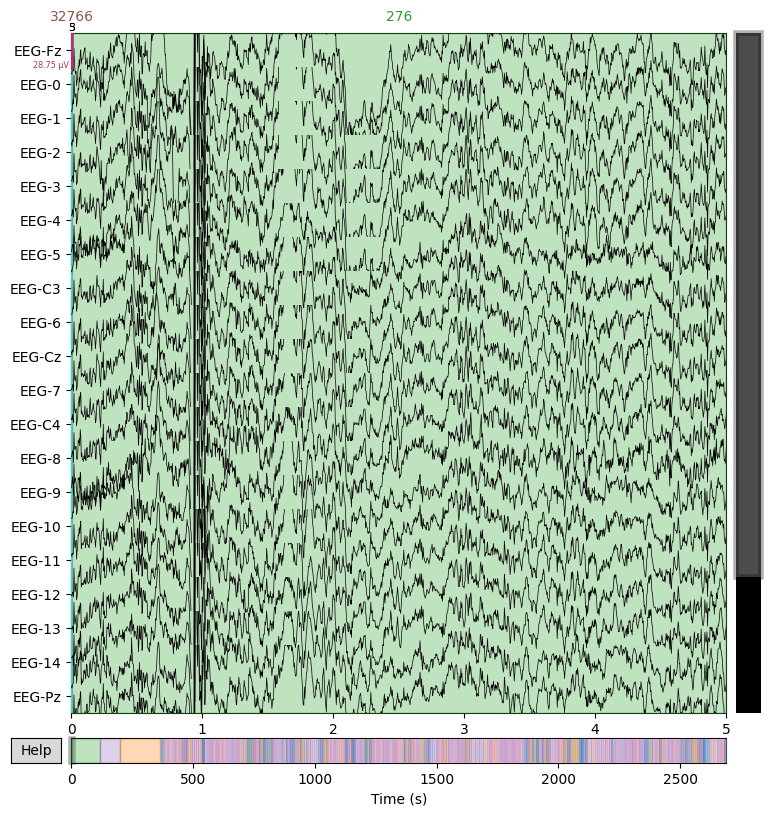

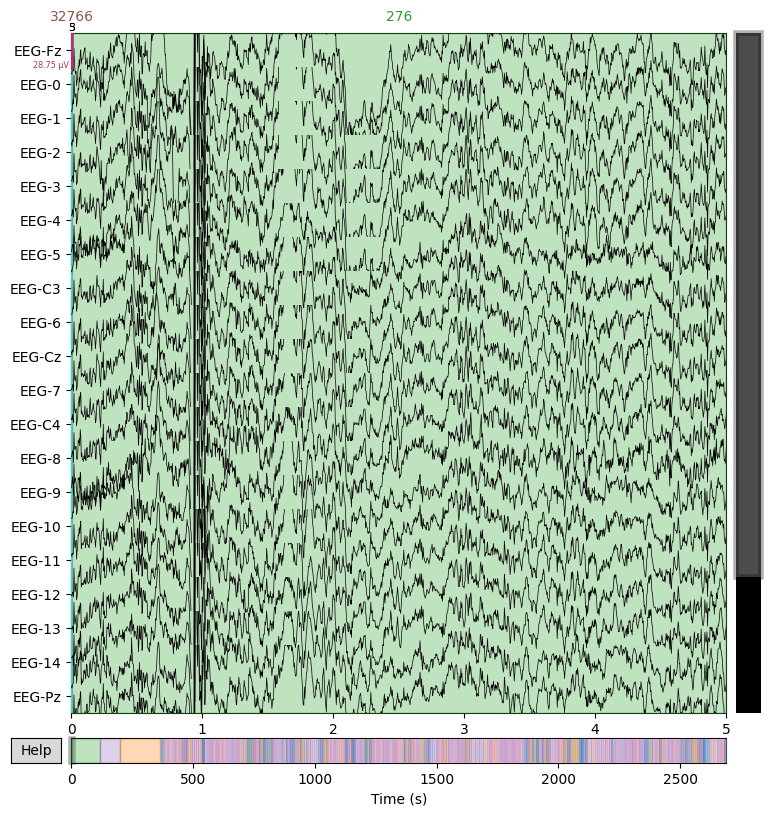

In [156]:
raw.plot(events=events[0],duration=5,scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/var/folders/_c/tqw9x_hs0mz3dzr5czl7c0tw0000gn/T/ipykernel_84598/1643215239.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=100)
/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


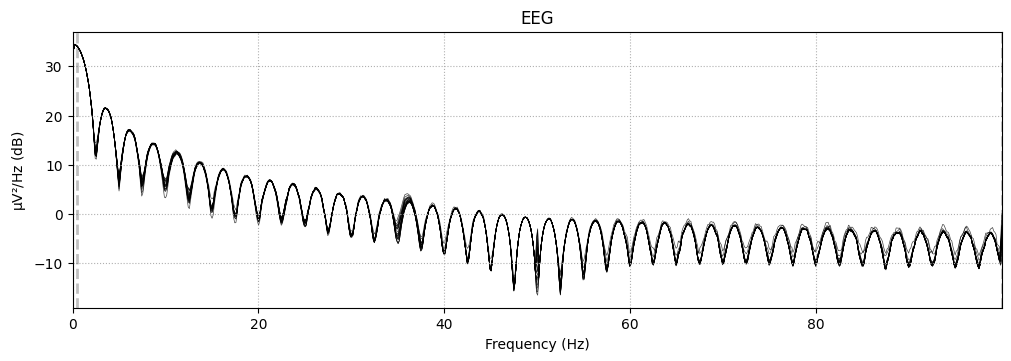

In [63]:
raw.plot_psd(fmax=100)

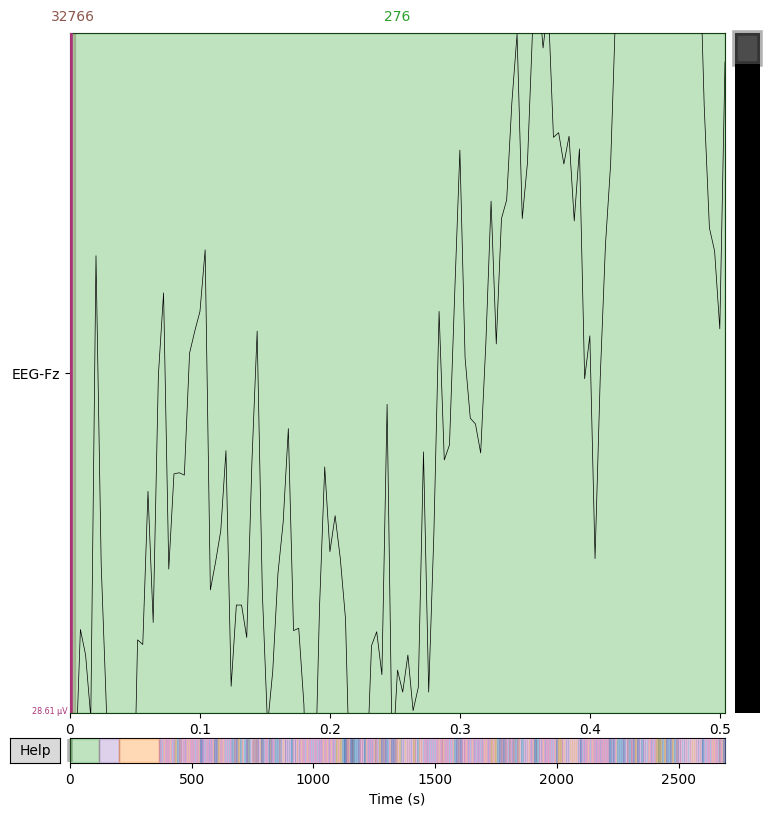

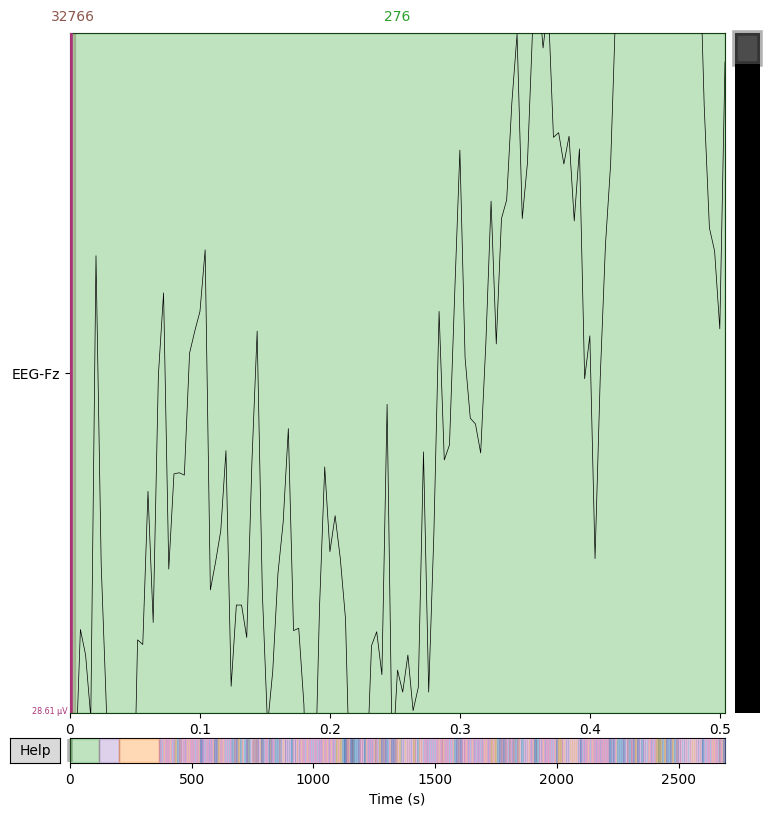

In [77]:
raw.plot(duration=0.5, n_channels=1, scalings='auto', block=True)

In [174]:
epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7)

Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 20 events and 201 original time points ...


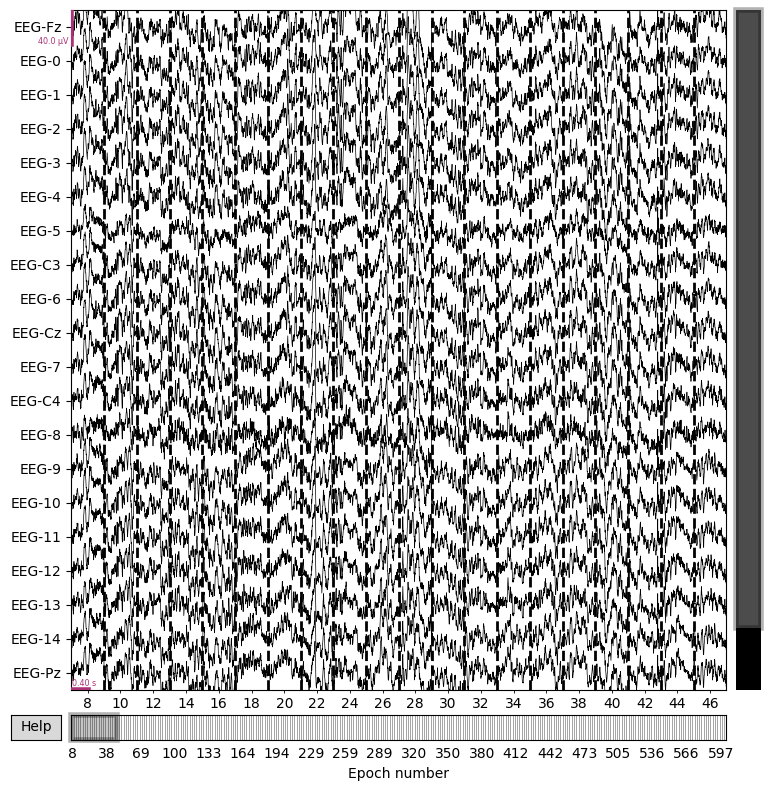

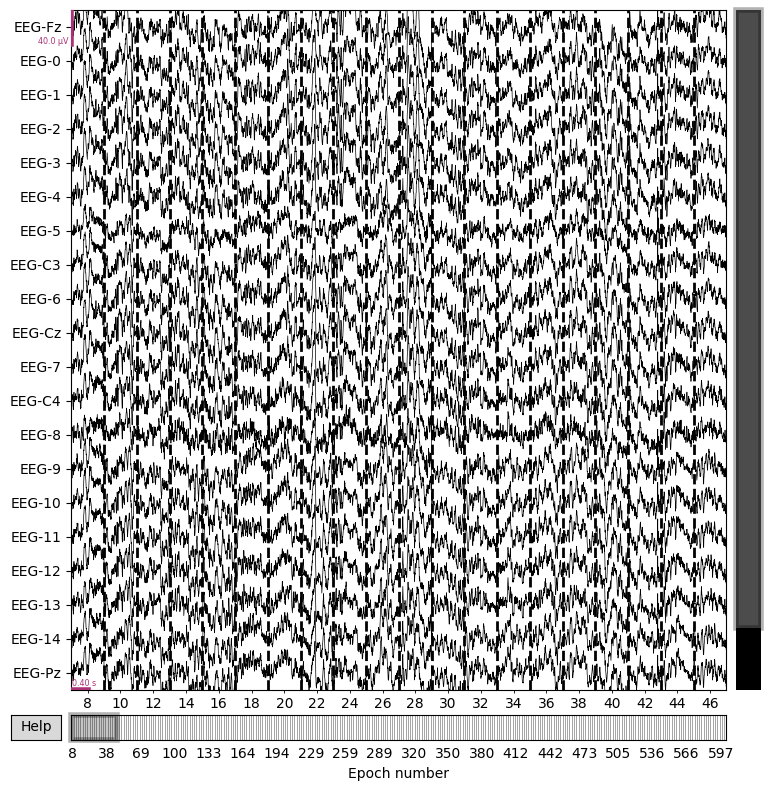

In [180]:
epochs.plot()

In [175]:
epochs.get_data().shape

Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


(288, 25, 201)

In [176]:
labels =epochs.events[:,-1]

In [177]:
labels

array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
        7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
        9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
        8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
        7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
        8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
        7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
       10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
       10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
       10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
        8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
        7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
        8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
        7, 10,  7, 10,  7

In [178]:
evoked_1 = epochs['7'].average()
evoked_2 = epochs['8'].average()
evoked_3 = epochs['9'].average()
evoked_4 = epochs['10'].average()

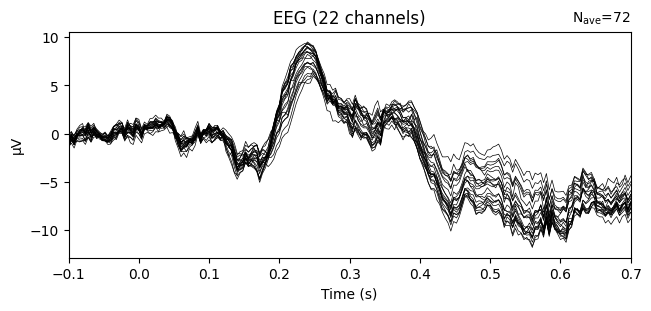

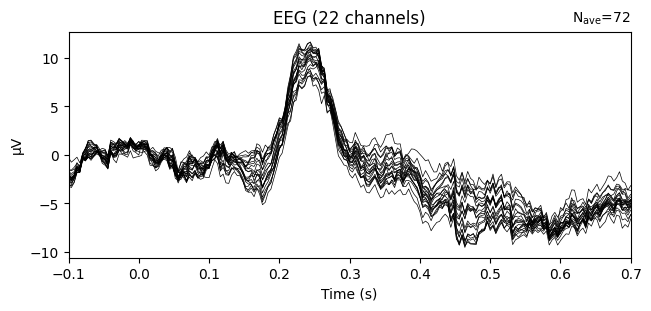

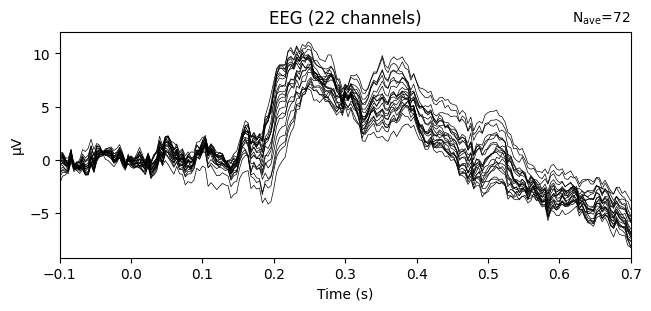

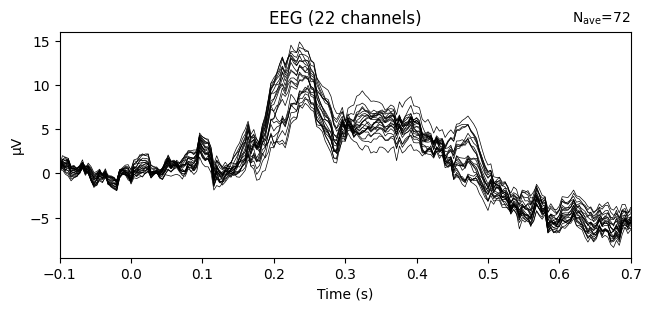

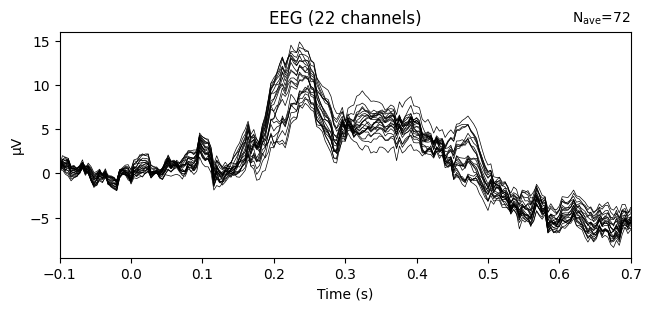

In [182]:
evoked_1.plot()
evoked_2.plot()
evoked_3.plot()
evoked_4.plot()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


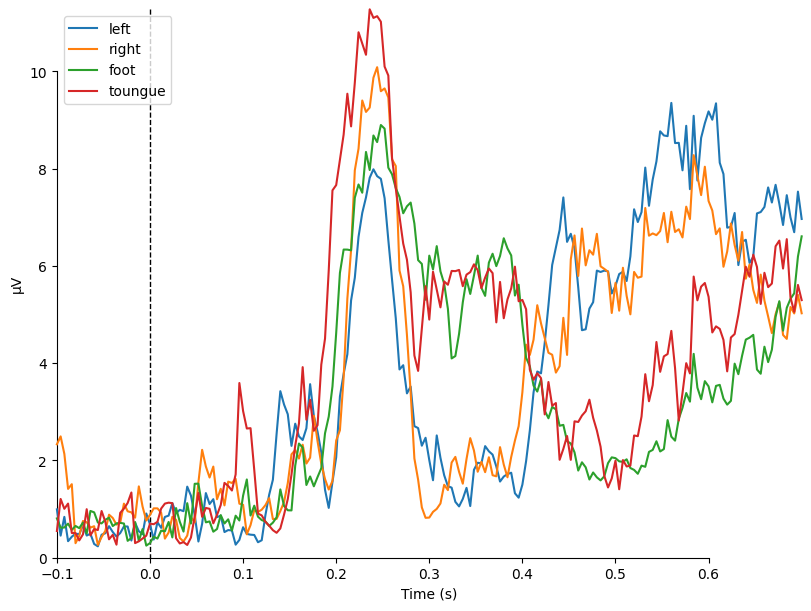

[<Figure size 800x600 with 1 Axes>]

In [179]:
dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'toungue':evoked_4}
mne.viz.plot_compare_evokeds(dicts)

In [29]:
import mne
import pandas as pd 
import numpy
from scipy.io import loadmat
import scipy
import matplotlib.pyplot as plt

def motor_img_reading(path):
    raw = mne.io.read_raw_gdf(path,eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7,on_missing='Alert')
    labels=epochs.events[:,-1] 
    features=epochs.get_data()
    return labels,features

In [35]:
labels,features = motor_img_reading('data_gdf/A01T.gdf')
features.shape,labels.shape

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


((288, 22, 201), (288,))

In [36]:
def display_motor_data(path):
    raw = mne.io.read_raw_gdf(path,eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7,on_missing='Alert')
    labels=epochs.events[:,-1] 
    features=epochs.get_data()
    evoked_1 = epochs['7'].average()
    evoked_2 = epochs['8'].average()
    evoked_3 = epochs['9'].average()
    evoked_4 = epochs['10'].average()
    dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'toungue':evoked_4}
    plot = mne.viz.plot_compare_evokeds(dicts)
    return plot

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


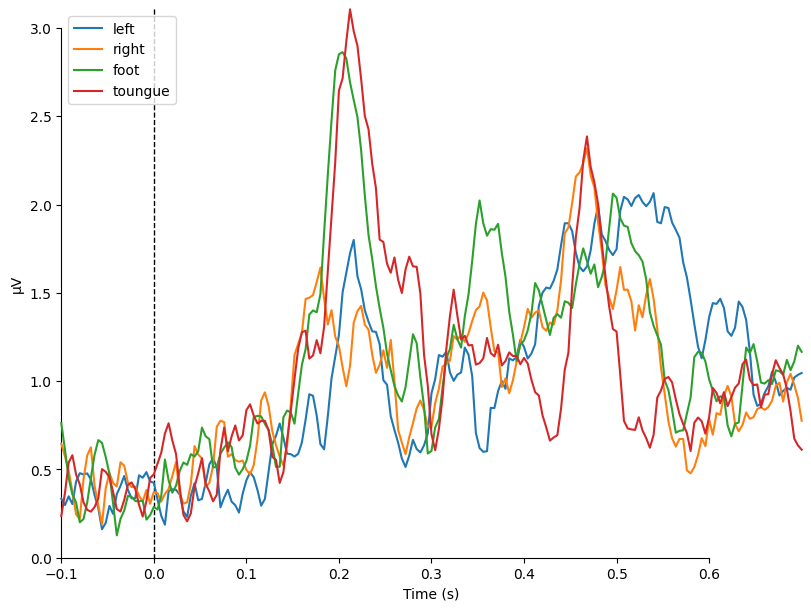

In [37]:
plot = display_motor_data('data_gdf/A01T.gdf')

In [11]:
### Improvement

In [1]:
import mne
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from mne.preprocessing import ICA
from mne.decoding import CSP
import matplotlib.pyplot as plt 
import numpy as np
from mne.decoding import CSP

In [12]:
#Data Preprocessing Enhancement 
raw = mne.io.read_raw_gdf('data_gdf/A01T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)

def preprocessing_eeg(raw):
    """
    Preprocessing raw data by applying a band-pass filter and ICA.
    Parameter: raw(mne.io.Raw): Raw EEG Data.
    Returns: raw_clean(mne.io.Raw):Cleaned EEG data after artifact removal.
    """
    #Apply band-pass filter
    raw.filter(8.,30.,fir_design='firwin',skip_by_annotation='edge')

    #Apply ICA for artifact removal
    ica = ICA(n_components=15,random_state=97,max_iter=800)
    ica.fit(raw)
    ica.exclude = [0] #indices of components to exclude (such as eye blinks)
    raw_clean = ica.apply(raw)

    return raw_clean

# to run the function individually and check the preprocessing:
#preprocessing_eeg(raw)

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Fitting ICA to data using 22 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [17]:
# Feature Extraction using CSP and Time-Frequency Analysis

def motor_img_reading(path):
    raw = mne.io.read_raw_gdf(path,eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7,on_missing='Alert')
    labels=epochs.events[:,-1] 
    features=epochs.get_data()
    return labels,features

labels,features = motor_img_reading('data_gdf/A01T.gdf')
events = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7,on_missing='Alert')

events
epochs

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs |  288 events (good & bad), -0.1 – 0.7 s, baseline -0.1 – 0 s, ~29 kB, data not loaded,
 '7': 72
 '8': 72
 '9': 72
 '10': 72>

In [20]:


def extract_features(epochs):
    """
    Extracts features using CSP and calculates power spectral density.

    Parameters:
    epochs (mne.Epochs): Epochs object containing the EEG data.

    Returns:
    combined_features (np.array): Combined CSP and PSD features.
    """
    # Initialize CSP with fewer components and regularization
    csp = CSP(n_components=2, reg='ledoit_wolf', log=True, cov_est='epoch')
    
    # Apply CSP on epochs data
    try:
        features = csp.fit_transform(epochs.get_data(), epochs.events[:, -1])
    except np.linalg.LinAlgError as e:
        print(f"Error in CSP transformation: {e}")
        return None

    # Calculate PSD for each epoch
    psd_features = np.array([mne.time_frequency.psd_multitaper(epoch, fmin=8., fmax=30., verbose=False)[0] for epoch in epochs])
    
    # Flatten the PSD features
    psd_features = psd_features.reshape(psd_features.shape[0], -1)
    
    # Combine CSP features with PSD features
    combined_features = np.hstack((features, psd_features))
    
    return combined_features

# Example of calling the function
combined_features = extract_features(epochs)
if combined_features is not None:
    print(f"Extracted features shape: {combined_features.shape}")
else:
    print("Feature extraction failed due to CSP convergence issue.")


Using data from preloaded Raw for 288 events and 201 original time points ...
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 25 dim * 2.7e+08  max singular value)
    Estimated rank (mag): 24
    MAG: rank 24 computed from 25 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 25 -> 24
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 25 dim * 2.2e+08  max singular value)
    Estimated rank (mag): 24
    MAG: rank 24 computed from 25 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 25 -> 24
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 25 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 24
    MAG: rank 24 computed from 25 data channels with 0 projectors
    

/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:675: RuntimeWarning: invalid value encountered in sqrt
  omega = np.sqrt(omega12 * omega21)
/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:677: RuntimeWarning: invalid value encountered in sqrt
  tmp = np.sqrt(omega21 / omega12)


In [23]:
# Model Building and Evaluation
def train_model(features, labels):
    """
    Trains and evaluates a classifier using cross-validation.

    Parameters:
    features (np.array): Extracted features.
    labels (np.array): Corresponding labels.

    Returns:
    clf (object): Trained classifier.
    """
    # Initialize the classifier (e.g., SVM with LDA)
    clf = Pipeline([('lda', LDA()), ('svm', SVC(kernel='linear', probability=True))])
    
    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, features, labels, cv=cv, scoring='accuracy')
    
    print(f'Cross-validation accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}')
    
    # Train the classifier on the entire dataset
    clf.fit(features, labels)
    
    return clf

In [29]:
# Plotting Enhancements
def plot_topomap(epochs):
    """
    Plots the topographical map of EEG data.

    Parameters:
    epochs (mne.Epochs): Epochs object containing the EEG data.
    """
    # Calculate the average evoked response
    evoked = epochs.average()
    
    # Plot the topomap
    evoked.plot_topomap(times=np.linspace(0, 0.5, 5), ch_type='eeg', show=True)

def motor_img_analysis(path):
    """
    Complete workflow for motor imagery EEG analysis including preprocessing, feature extraction, model training, and visualization.

    Parameters:
    path (str): Path to the GDF file.
    """
    # Load and preprocess the data
    raw = mne.io.read_raw_gdf(path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)
    raw_clean = preprocessing_eeg(raw)
    
    # Extract events and epochs
    events = mne.events_from_annotations(raw_clean)
    epochs = mne.Epochs(raw_clean, events[0], event_id=[7, 8, 9, 10], tmin=-0.1, tmax=0.7, on_missing='alert')
    labels = epochs.events[:, -1]
    
    # Extract features
    features = extract_features(epochs)
    
    # Train and evaluate the model
    clf = train_model(features, labels)
    
    # Plot topomap to visualize the spatial distribution of EEG activity
    plot_topomap(epochs)
    
    return clf

# Run the analysis
model = motor_img_analysis('data_gdf/A01T.gdf')

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Fitting ICA to data using 22 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Selecting by number: 15 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 25 dim * 2.7e+08  max singular value)
    Estimated rank (mag): 24
    MAG: rank 24 computed from 25 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 25 -> 24
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-

/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:675: RuntimeWarning: invalid value encountered in sqrt
  omega = np.sqrt(omega12 * omega21)
/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:677: RuntimeWarning: invalid value encountered in sqrt
  tmp = np.sqrt(omega21 / omega12)


Error in CSP transformation: SVD did not converge


TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [58]:

import mne
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from mne.decoding import CSP
from mne import Epochs

def preprocess_and_extract_features(path):
    """
    Reads the EEG data, preprocesses it, and extracts features using CSP and PSD.

    Parameters:
    path (str): Path to the GDF file.

    Returns:
    features (np.array): Extracted features.
    labels (np.array): Corresponding labels.
    """
    # Read the raw GDF file
    raw = mne.io.read_raw_gdf(path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    raw.set_eeg_reference()
    
    # Apply a band-pass filter
    raw.filter(8., 30., fir_design='firwin', skip_by_annotation='edge')
    
    # Extract events and epochs
    events = mne.events_from_annotations(raw)
    epochs = mne.Epochs(raw, events[0], event_id=[7, 8, 9, 10], tmin=-0.1, tmax=0.7, on_missing='alert')
    
    labels = epochs.events[:, -1]
    
    # Initialize CSP with regularization
    csp = CSP(n_components=3, reg='ledoit_wolf', log=True, cov_est='epoch')
    
    # Apply CSP on epochs data
    try:
        features = csp.fit_transform(epochs.get_data(), labels)
    except np.linalg.LinAlgError as e:
        print(f"SVD did not converge: {e}")
        return None, None
    
    # Calculate PSD for each epoch
    psd_features = np.array([mne.time_frequency.psd_multitaper(epoch, fmin=8., fmax=30., verbose=False)[0] for epoch in epochs])
    
    # Flatten the PSD features
    psd_features = psd_features.reshape(psd_features.shape[0], -1)
    
    # Combine CSP features with PSD features
    combined_features = np.hstack((features, psd_features))
    
    return combined_features, labels

def train_svm(features, labels):
    """
    Trains an SVM classifier on the provided features.

    Parameters:
    features (np.array): Extracted features.
    labels (np.array): Corresponding labels.

    Returns:
    clf (object): Trained classifier.
    """
    if features is None or labels is None:
        print("No features to train on due to previous errors.")
        return None
    
    # Standardize features
    scaler = StandardScaler()
    
    # Initialize the classifier with a linear kernel and more iterations
    svm = SVC(kernel='linear', C=1.0, max_iter=10000)
    
    # Create a pipeline
    clf = Pipeline([('scaler', scaler), ('svm', svm)])
    
    # Train the classifier
    clf.fit(features, labels)
    
    return clf

# Set the path to the specific data file
path = 'data_gdf/A01T.gdf'

# Preprocess data and extract features
features, labels = preprocess_and_extract_features(path)

# Train the SVM model
if features is not None:
    clf = train_svm(features, labels)

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


    Using tolerance 3.8e-07 (2.2e-16 eps * 22 dim * 7.7e+07  max singular value)
    Estimated rank (mag): 21
    MAG: rank 21 computed from 22 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 22 -> 21
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 5.1e-07 (2.2e-16 eps * 22 dim * 1e+08  max singular value)
    Estimated rank (mag): 21
    MAG: rank 21 computed from 22 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 22 -> 21
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-07 (2.2e-16 eps * 22 dim * 1.9e+08  max singular value)
    Estimated rank (mag): 21
    MAG: rank 21 computed from 22 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Reducing data rank from 22 -> 21
Estimating covariance using LEDOIT_

/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:675: RuntimeWarning: invalid value encountered in sqrt
  omega = np.sqrt(omega12 * omega21)
/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/decoding/csp.py:677: RuntimeWarning: invalid value encountered in sqrt
  tmp = np.sqrt(omega21 / omega12)
